In [ ]:
!pip install pycaret

In [5]:
import plotly.express as px
import pandas as pd
import numpy as np
coor=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_st/meteorological_models/distan_lat42.225lon-8.63p10R4Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="Nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

In [6]:
import pandas as pd
station_all=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_st/meteorological_station/LEVX.csv",parse_dates=["time"]).drop(columns=["Unnamed: 0"]).set_index("time")
print(station_all)
station_all["dir_o"].describe()

                         temp_o     tempd_o    rh_o  dir_o     spd_o  \
time                                                                   
2008-01-01 00:00:00  278.550001  277.950000   95.91  220.0  3.601108   
2008-01-01 01:00:00  278.050000  277.450001   95.89  230.0  3.086664   
2008-01-01 02:00:00  278.050000  277.649999   97.24  190.0  5.144440   
2008-01-01 02:30:00  276.150001  275.149999   93.14  240.0  3.601108   
2008-01-01 03:00:00  278.750001  277.549999   91.98  230.0  3.086664   
...                         ...         ...     ...    ...       ...   
2020-12-24 21:30:00  278.150000  278.150000  100.00   50.0  2.572220   
2020-12-24 22:00:00  278.150000  277.150000   93.24   60.0  2.057776   
2020-12-24 22:30:00  278.150000  277.150000   93.24   80.0  1.543332   
2020-12-24 23:00:00  278.150000  277.150000   93.24   30.0  3.601108   
2020-12-24 23:30:00  278.150000  277.150000   93.24   40.0  3.086664   

                    wind_gust_o  mslp_o  visibility_o skyc1_o s

count    229250.000000
mean        147.828471
std         120.560398
min          -1.000000
25%           0.000000
50%         190.000000
75%         240.000000
max         360.000000
Name: dir_o, dtype: float64

In [48]:
#Count values for skyc1
station=station_all[["skyc1_o","temp_o"]]
station["skyc1_o"].value_counts()


M      122708
FEW     36527
SCT     28960
BKN     22790
VV       8354
NSC      3610
OVC      3167
         3134
Name: skyc1_o, dtype: int64

In [49]:
#"   "meaning cavok or nil nan delete in concat
pd.options.display.max_rows = 999
station_all.loc[station_all.skyc1_o=="   "].sample(100)

,temp_o,tempd_o,rh_o,dir_o,spd_o,wind_gust_o,mslp_o,visibility_o,skyc1_o,skyc2_o,skyc3_o,skyl1_o,skyl2_o,skyl3_o,wxcodes_o,metar_o,fr_o
time,,,,,,,,,,,,,,,,,
2011-08-24 00:00:00,286.150001,285.149999,93.65,0.0,1.028888,M,1020.0,9994.0,,,,M,M,M,M,LEVX 240000Z VRB02KT CAVOK 13/12 Q1020,VFR
2011-11-07 14:30:00,289.150000,281.150001,59.01,-1.0,1.028888,M,1016.0,9994.0,,,,M,M,M,M,LEVX 071430Z VRB02KT CAVOK 16/08 Q1016,VFR
2011-10-11 14:00:00,302.149998,282.150000,28.63,0.0,0.514444,M,1025.0,9994.0,,,,M,M,M,M,LEVX 111400Z VRB01KT CAVOK 29/09 Q1025,VFR
2012-01-01 23:00:00,NaN,NaN,NaN,-1.0,NaN,M,NaN,NaN,,,,M,M,M,M,LEVX 012300Z NIL,VFR
2012-01-21 04:30:00,282.150000,281.150001,93.45,-1.0,1.028888,M,1033.0,9994.0,,,,M,M,M,M,LEVX 210430Z VRB02KT CAVOK 09/08 Q1033,VFR
2012-01-17 04:30:00,275.149999,275.149999,100.00,230.0,1.543332,M,1026.0,9994.0,,,,M,M,M,M,LEVX 170430Z 23003KT 190V280 CAVOK 02/02 Q1026,VFR
2011-12-11 04:00:00,279.150000,279.150000,100.00,220.0,2.057776,M,1018.0,9994.0,,,,M,M,M,M,LEVX 110400Z 22004KT CAVOK 06/06 Q1018,VFR
2011-11-25 02:30:00,281.150001,280.149999,93.40,-1.0,1.028888,M,1029.0,9994.0,,,,M,M,M,M,LEVX 250230Z VRB02KT CAVOK 08/07 Q1029,VFR
2011-09-21 00:30:00,288.150000,285.149999,82.25,0.0,0.514444,M,1019.0,9994.0,,,,M,M,M,M,LEVX 210030Z VRB01KT CAVOK 15/12 Q1019,VFR


In [50]:
station.loc[station.skyc1_o=="   ",["skyc1_l"]]="CAVOK"
station.loc[station.skyc1_o=="M",["skyc1_l"]]="CAVOK" 
station.loc[station.skyc1_o=="VV ",["skyc1_l"]]="VV"
station.loc[station.skyc1_o=="FEW",["skyc1_l"]]="FEW"
station.loc[station.skyc1_o=="SCT",["skyc1_l"]]="SCT"
station.loc[station.skyc1_o=="BKN",["skyc1_l"]]="BKN"
station.loc[station.skyc1_o=="OVC",["skyc1_l"]]="OVC"
station.loc[station.skyc1_o=="NSC",["skyc1_l"]]="NSC"
station=station.drop(columns=["temp_o"])
station['skyc1_l'].value_counts()
labels=['CAVOK', 'FEW', 'SCT', 'BKN', 'VV', 'NSC', 'OVC']
    

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [51]:
station.sample(100)

,skyc1_o,skyc1_l
time,,
2020-05-18 16:00:00,M,CAVOK
2009-06-29 14:00:00,M,CAVOK
2017-12-29 19:00:00,BKN,BKN
2019-02-05 04:30:00,BKN,BKN
2015-04-09 14:30:00,SCT,SCT
2015-05-09 03:30:00,BKN,BKN
2013-07-30 07:00:00,M,CAVOK
2016-03-29 12:00:00,BKN,BKN
2012-02-10 20:30:00,M,CAVOK


**Forecast D0**

In [61]:
#ria forecast d1
model4k=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_st/meteorological_models/lat42.225lon-8.63p10R4KmD0.csv",parse_dates=["time"]).set_index("time")
model4k

,dir0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,lhflx0,lwflx0,conv_prec0,...,cape9,cin9,cfh9,cfl9,cfm9,cft9,HGT5009,HGT8509,T5009,T8509
time,,,,,,,,,,,,,,,,,,,,,
2008-01-01 01:00:00,144.628357,3.831499,6.448897,102287.132812,280.022430,0.892607,24102.808594,12.980614,293.892212,0.0,...,0.0,-0.000188,1.0,0.000000,0.000000,1.00000,5597.893066,1497.146240,253.327194,277.210388
2008-01-01 02:00:00,147.921097,3.832692,6.672883,102206.570312,280.007874,0.876593,24068.431641,16.218111,301.791016,0.0,...,0.0,0.000039,1.0,0.000000,0.530000,1.00000,5589.398926,1489.944702,252.961868,277.016876
2008-01-01 03:00:00,143.393280,5.442433,8.808276,102199.117188,280.104797,0.852357,24079.357422,30.171259,310.720306,0.0,...,0.0,0.000066,1.0,0.000000,1.000000,1.00000,5583.069824,1489.035278,252.982819,276.464508
2008-01-01 04:00:00,148.121201,5.950326,9.456440,102130.187500,280.257111,0.826763,24082.630859,39.340668,311.036621,0.0,...,0.0,0.000102,1.0,0.000000,1.000000,1.00000,5578.958984,1486.376465,252.923691,276.808807
2008-01-01 05:00:00,144.934830,6.004587,9.431707,102095.398438,280.096802,0.815603,24156.925781,38.444511,268.789703,0.0,...,0.0,-0.000305,0.0,0.000000,0.000000,0.00000,5576.894043,1483.500488,253.006378,277.129700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-11 19:00:00,167.249893,4.803071,10.443219,102130.304688,285.274139,0.883530,24094.119141,30.348995,331.899139,0.0,...,0.0,0.000750,0.6,0.093750,0.000000,0.60000,5669.991211,1510.901978,258.318634,280.277496
2020-11-11 20:00:00,160.990204,5.888032,12.039003,102151.843750,285.359863,0.873678,22888.912109,40.605156,366.950897,0.0,...,0.0,0.000316,0.5,0.500000,0.531250,0.53125,5676.644043,1515.951782,258.397308,280.022552
2020-11-11 21:00:00,169.326263,5.852474,11.513367,102204.882812,285.613678,0.870425,22076.751953,43.137783,367.624512,0.0,...,0.0,-0.000039,0.6,0.500000,0.453125,0.60000,5681.215820,1519.740967,258.154877,280.516174


In [62]:
#concat station model
df_all4k=pd.concat([station,model4k],axis=1).dropna()
df_all4k=df_all4k.drop(columns=["skyc1_o"])
df_all4k.sample(100)

,skyc1_l,dir0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,lhflx0,lwflx0,...,cape9,cin9,cfh9,cfl9,cfm9,cft9,HGT5009,HGT8509,T5009,T8509
time,,,,,,,,,,,,,,,,,,,,,
2015-11-13 01:00:00,CAVOK,46.883728,1.914373,3.317694,102840.398438,284.882751,0.929460,24042.093750,4.075224,327.403534,...,0.000000,-0.000398,0.400000,0.000000,0.000000,0.400000,5751.062012,1583.129150,257.259369,282.350067
2014-06-17 12:00:00,CAVOK,82.986877,3.623667,3.990387,101540.781250,299.858490,0.347183,24135.000000,352.585236,329.424744,...,0.000000,-0.000040,0.000000,0.000000,0.000000,0.000000,5726.355957,1498.253784,262.547699,286.109253
2018-09-10 18:00:00,CAVOK,280.175720,1.352224,1.775347,102268.156250,293.996765,0.738957,24042.806641,31.500000,331.521729,...,0.000000,-0.000977,0.020000,0.000000,0.000000,0.020000,5836.515137,1573.146973,264.451050,289.448425
2020-10-03 14:00:00,SCT,273.849670,5.267638,6.891486,101088.257812,288.882507,0.699886,24080.158203,114.907272,299.531067,...,46.070000,-2.679594,0.000000,0.272261,0.000000,0.272261,5578.312988,1420.584961,262.003387,276.686737
2020-01-25 14:00:00,FEW,287.823364,3.136430,3.440363,101609.976562,284.747314,0.667050,24052.927734,107.099998,269.445648,...,0.000000,0.000367,0.000000,0.000000,0.000000,0.000000,5454.458984,1440.298584,246.466248,273.955200
2020-05-14 16:00:00,BKN,276.995758,3.645126,4.630261,100448.632812,288.722382,0.836234,24035.503906,42.100052,378.317413,...,456.440002,-19.149609,0.600000,0.515625,0.984375,0.984375,5490.667969,1395.476074,253.983810,280.821808
2018-07-15 09:00:00,SCT,217.926987,0.312925,0.444743,101851.437500,289.905243,0.873283,24040.519531,8.100000,381.081787,...,1.300000,-0.009062,0.000000,0.300000,0.240000,0.300000,5683.478027,1504.587036,258.515503,283.505951
2017-02-16 04:00:00,CAVOK,106.584198,4.897666,6.855282,102869.406250,283.632446,0.742061,24038.125000,49.048149,282.740356,...,0.000000,-0.001016,0.000000,0.000000,0.012695,0.012695,5647.520020,1574.446533,251.636246,278.004364
2009-06-16 04:00:00,CAVOK,78.309265,1.492878,2.058142,101766.750000,286.058319,0.940192,24039.105469,0.204271,317.063080,...,0.000000,0.002188,0.000000,0.002727,0.000000,0.002727,5732.443848,1512.865967,260.543488,289.264832


In [63]:
df_all4k["skyc1_l"].value_counts(normalize=True)

CAVOK    0.562007
FEW      0.160032
SCT      0.122557
BKN      0.093688
VV       0.032753
NSC      0.015464
OVC      0.013498
Name: skyc1_l, dtype: float64

In [64]:
df_all4k=df_all4k[df_all4k.skyc1_l!="NSC"]
df_all4k=df_all4k[df_all4k.skyc1_l!="VV"]
df_all4k["skyc1_l"].value_counts(normalize=True)

CAVOK    0.590479
FEW      0.168139
SCT      0.128765
BKN      0.098435
OVC      0.014182
Name: skyc1_l, dtype: float64

**machine learning d0**

In [65]:
from pycaret.classification import *
#drop variables model labeled
clas = setup(df_all4k,
             target = 'skyc1_l',
             session_id=20,normalize=False ,train_size=.85,remove_multicollinearity=True,
             fix_imbalance=False,ignore_low_variance=True,feature_selection=True,
             feature_selection_threshold =.15,pca=False,polynomial_features=False,
             trigonometry_features=False,feature_interaction=False)

              

,Description,Value
0,session_id,20
1,Target,skyc1_l
2,Target Type,Multiclass
3,Label Encoded,"BKN: 0, CAVOK: 1, FEW: 2, OVC: 3, SCT: 4"
4,Original Data,"(101184, 231)"
5,Missing Values,False
6,Numeric Features,230
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [83]:
compare_models(fold=5,sort="F1")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6960,0.8666,0.3877,0.6515,0.6601,0.4325,0.4458,34.442
et,Extra Trees Classifier,0.6950,0.8669,0.3863,0.6490,0.6584,0.4298,0.4436,13.760
lightgbm,Light Gradient Boosting Machine,0.6915,0.8651,0.3902,0.6413,0.6555,0.4247,0.4381,6.540
ada,Ada Boost Classifier,0.6681,0.7846,0.3580,0.6078,0.6239,0.3768,0.3922,10.016
dt,Decision Tree Classifier,0.5878,0.6933,0.3599,0.5955,0.5915,0.3156,0.3157,2.596
nb,Naive Bayes,0.5502,0.7281,0.3668,0.5651,0.5509,0.2519,0.2541,0.164
knn,K Neighbors Classifier,0.5707,0.6902,0.2832,0.5107,0.5289,0.1890,0.1972,9.440
lda,Linear Discriminant Analysis,0.5902,0.7527,0.2682,0.5034,0.5138,0.1572,0.1832,0.984
svm,SVM - Linear Kernel,0.5486,0.0000,0.2828,0.4855,0.4922,0.1590,0.1751,18.836
ridge,Ridge Classifier,0.5908,0.0000,0.2356,0.4841,0.4882,0.0968,0.1346,0.128


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=20, verbose=0,
                       warm_start=False)

In [68]:
model=create_model("lightgbm",n_estimators=150,fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6909,0.8655,0.3935,0.6418,0.6559,0.4253,0.4378
1,0.6955,0.8686,0.3981,0.6471,0.6602,0.4324,0.4459
2,0.6938,0.8671,0.3945,0.6452,0.6590,0.4308,0.4435
3,0.6905,0.8672,0.3872,0.6420,0.6565,0.4263,0.4379
4,0.6908,0.8657,0.3864,0.6398,0.6545,0.4234,0.4367
Mean,0.6923,0.8668,0.3920,0.6432,0.6572,0.4277,0.4404
SD,0.0020,0.0011,0.0045,0.0026,0.0021,0.0034,0.0037


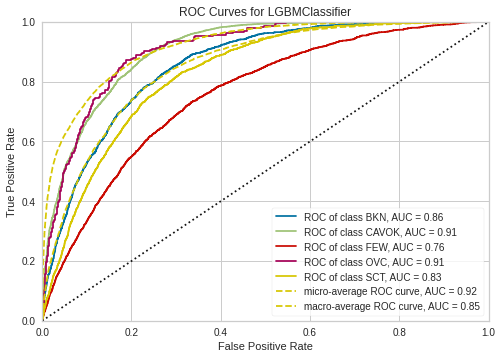

In [69]:
plot_model(model, plot = 'auc')

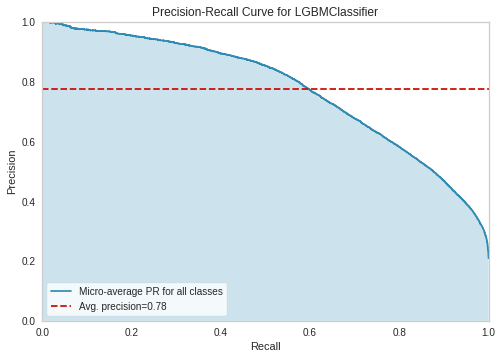

In [70]:
plot_model(model, plot = 'pr')

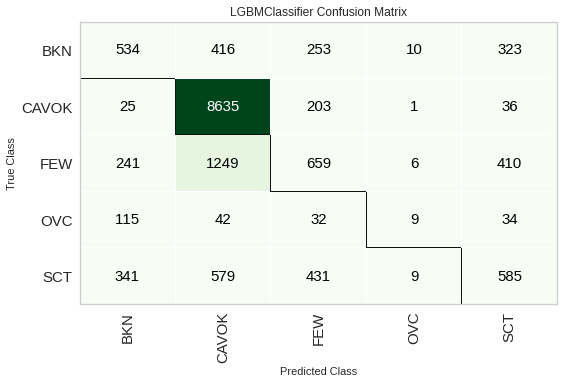

In [71]:
plot_model(model,'confusion_matrix')

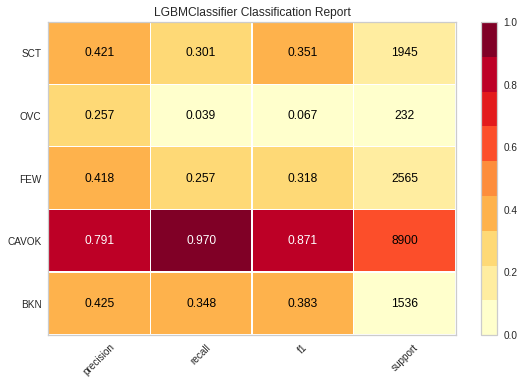

In [72]:
plot_model(model,'class_report')

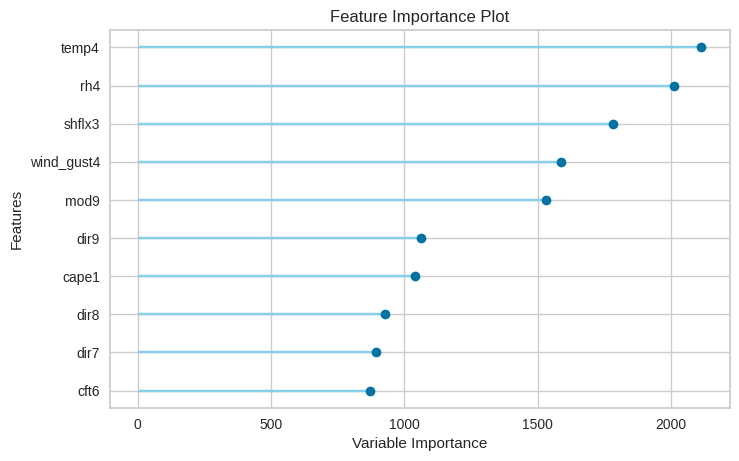

In [73]:
plot_model(model,"feature")

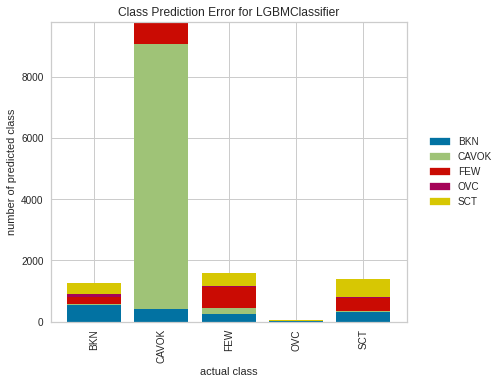

In [74]:
plot_model(model,"error")

**Export model**

In [75]:
x_var=get_config("X_train").columns
x_var

Index(['shflx3', 'rh4', 'dir8', 'temp4', 'cfl7', 'cfl0', 'cfl9', 'cfl8',
       'cfl3', 'dir6', 'dir9', 'cfl6', 'wind_gust4', 'dir7', 'dir4', 'dir0',
       'dir5', 'cfl5', 'cft9', 'cfl1', 'cfl2', 'cft6', 'mod9', 'cfl4',
       'cape1'],
      dtype='object')

In [76]:
#define x and y
Y=df_all4k.skyc1_l
X=df_all4k[x_var]

In [77]:
#Run the machine learning model
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm.sklearn import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, random_state=1)
#ml_model=ExtraTreesClassifier(n_estimators=150).fit(X_train,y_train)
ml_model=LGBMClassifier(n_estimators=250).fit(X_train,y_train)


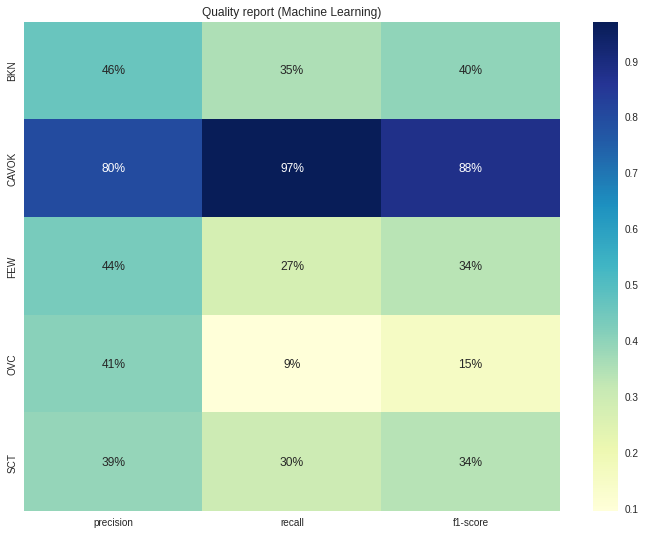

In [78]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
cr=pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T
plt.figure(figsize=(12, 9))
plt.title("Quality report (Machine Learning)")
sns.heatmap(cr[:-3].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.0%');


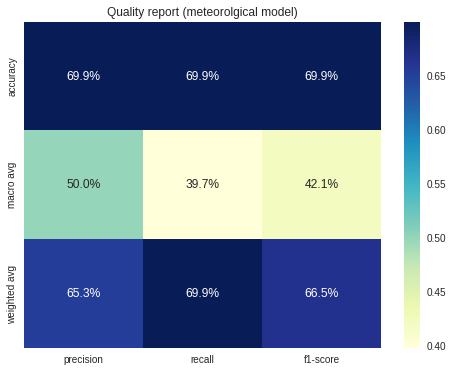

In [79]:
plt.figure(figsize=(8, 6))
plt.title("Quality report (meteorolgical model)")
sns.heatmap(cr[-3:].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.1%');

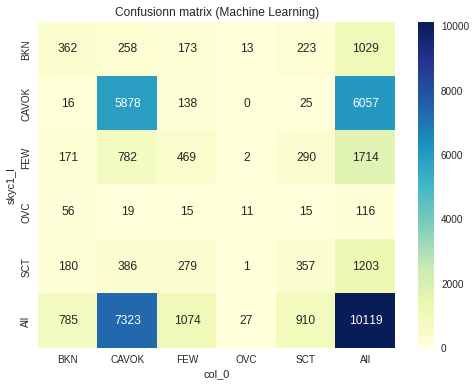

In [80]:
plt.figure(figsize=(8, 6))
plt.title("Confusionn matrix (Machine Learning)")
import seaborn as sns
global_sc=pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
sns.heatmap(global_sc,annot=True,cmap="YlGnBu",fmt='.0f');

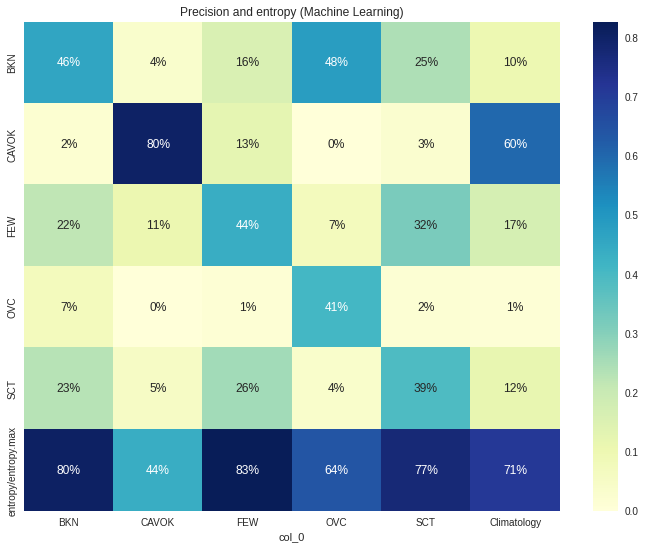

In [81]:
import math
from scipy.stats import entropy
plt.figure(figsize=(12, 9))
plt.title("Precision and entropy (Machine Learning)")
column_sc=pd.crosstab(y_test, ml_model.predict(X_test), margins=True,normalize="columns")
column_sc=column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropy/entropy.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatology"})
sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%');

In [82]:
import pickle
model_dict={"x_var":x_var,"ml_model":ml_model,"coor":coor}
pickle.dump(model_dict, open("skyc1_LEVX_d0.al", 'wb'))